# Import Function

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy

# ReadData

In [3]:
path_images = 'data/animal/'


In [4]:
filenames = get_image_files(path_images)
filenames[:10]

[WindowsPath('data/animal/bear_0.jpg'),
 WindowsPath('data/animal/bear_1.jpg'),
 WindowsPath('data/animal/bear_10.jpg'),
 WindowsPath('data/animal/bear_100.jpg'),
 WindowsPath('data/animal/bear_101.jpg'),
 WindowsPath('data/animal/bear_102.jpg'),
 WindowsPath('data/animal/bear_103.jpg'),
 WindowsPath('data/animal/bear_104.jpg'),
 WindowsPath('data/animal/bear_105.jpg'),
 WindowsPath('data/animal/bear_106.jpg')]

In [5]:
batchsize = 64
np.random.seed(42)
regex_pattern = r'/([^/]+)_\d+.jpg$'

In [6]:
databunch = ImageDataBunch.from_name_re(path_images, filenames, 
                                   regex_pattern, ds_tfms=get_transforms(), 
                                   size=224, bs=batchsize).normalize(imagenet_stats)

In [7]:
len(databunch.train_ds), len(databunch.valid_ds)


(11555, 2888)

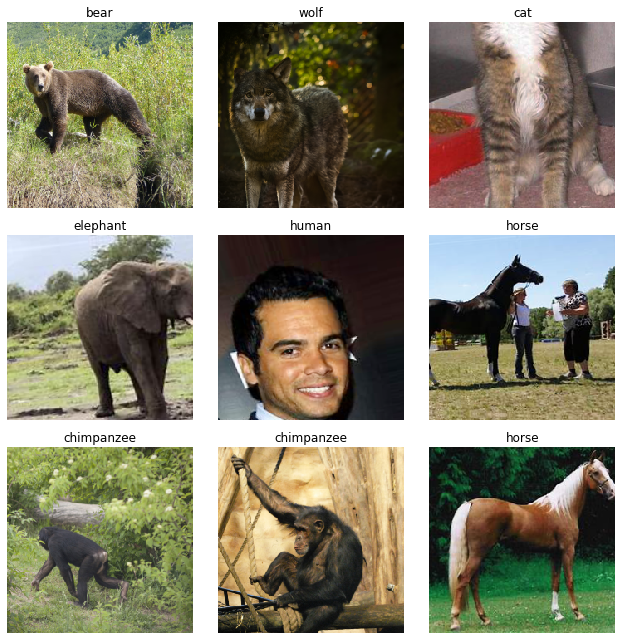

In [8]:
databunch.show_batch(rows=3, figsize=(9, 9))


In [9]:
print(databunch.classes)


['bear', 'cat', 'chimpanzee', 'dog', 'elephant', 'hippopotamus', 'horse', 'human', 'moose', 'raccoon', 'rhinoceros', 'sheep', 'wolf']


# CreateModel

In [7]:
learner = cnn_learner(databunch, models.resnet34, metrics=accuracy)


In [17]:
#learner.model = learner.model.cuda()

In [11]:
#from fastai.utils.mem import GPUMemTrace
#with GPUMemTrace():
defaults.device = torch.device('cuda') 
learner.fit_one_cycle(4)


epoch,train_loss,valid_loss,accuracy,time
0,0.340482,0.120363,0.963296,08:40
1,0.192603,0.094990,0.969875,08:04
2,0.136686,0.082548,0.975762,08:56
3,0.100539,0.076273,0.976801,11:34


In [12]:
learner.save('fastairestnet34v1+human', return_path=True)

WindowsPath('data/animal/models/fastairestnet34v1+human.pth')

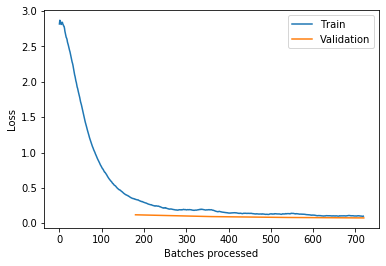

In [13]:
learner.recorder.plot_losses()
#loss

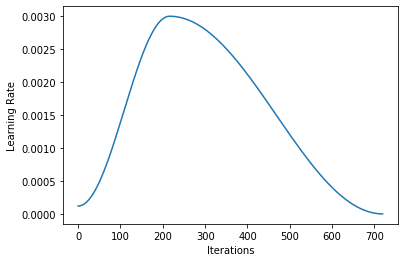

In [14]:
learner.recorder.plot_lr()
#learning rate

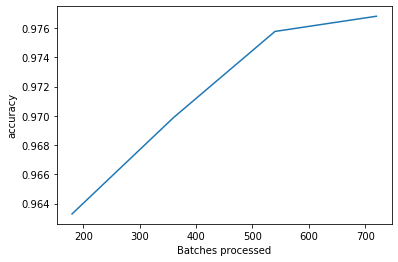

In [15]:
learner.recorder.plot_metrics()
#accuracy

In [16]:
interpretation = ClassificationInterpretation.from_learner(learner)
#CheckModel

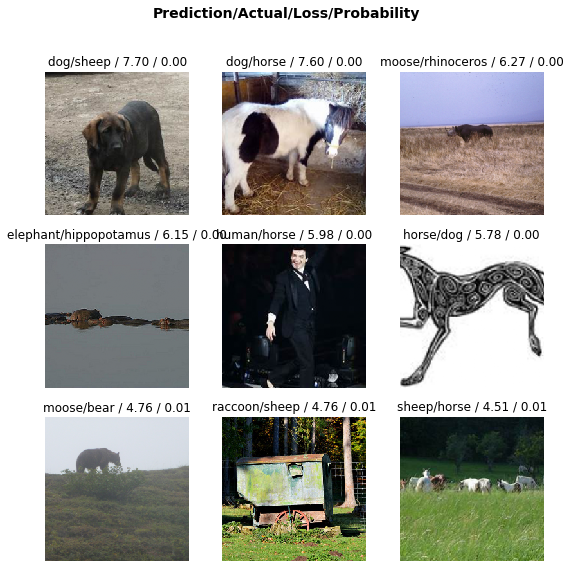

In [17]:
interpretation.plot_top_losses(9, figsize=(9,9), heatmap=False)

In [18]:
interpretation.most_confused(min_val=2)


[('sheep', 'horse', 7),
 ('cat', 'dog', 6),
 ('horse', 'sheep', 6),
 ('horse', 'elephant', 5),
 ('bear', 'moose', 4),
 ('dog', 'sheep', 2),
 ('hippopotamus', 'horse', 2),
 ('horse', 'human', 2),
 ('sheep', 'dog', 2),
 ('sheep', 'elephant', 2),
 ('wolf', 'raccoon', 2)]

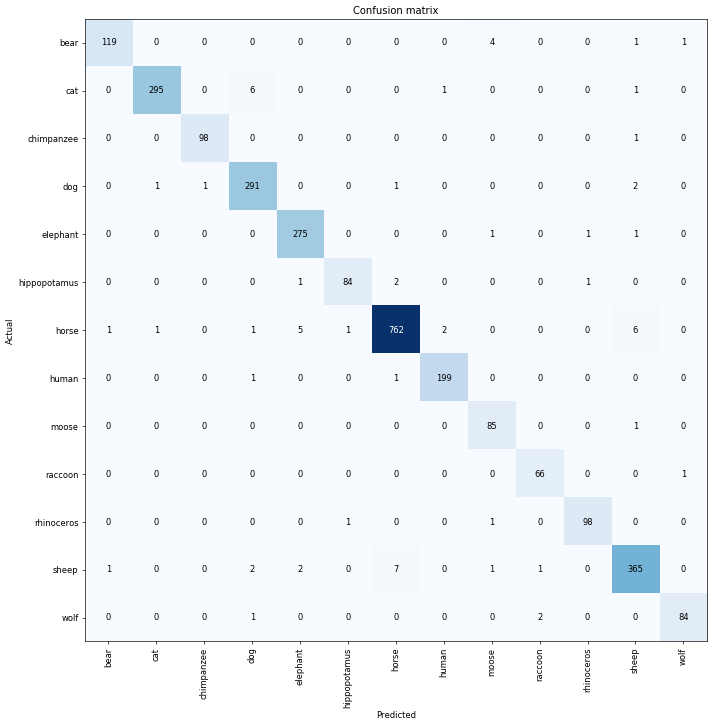

In [19]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [8]:
learner.load('fastairestnet34v1+human')


Learner(data=ImageDataBunch;

Train: LabelList (11555 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bear,bear,bear,bear,bear
Path: data\animal;

Valid: LabelList (2888 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
elephant,cat,dog,hippopotamus,dog
Path: data\animal;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [9]:
learner.unfreeze()
#unfreeze other layer

In [10]:
torch.cuda.empty_cache() 

In [11]:
import fastai
fastai.torch_core.defaults.device = 'cuda'

In [12]:
defaults.device = torch.device('cuda') 

In [27]:
learner.destroy()

this Learner object self-destroyed - it still exists, but no longer usable


In [22]:
learner.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


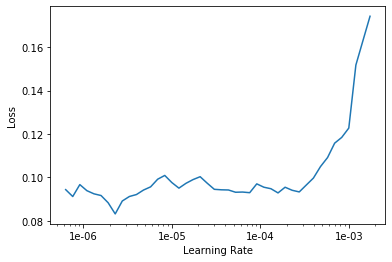

In [23]:
learner.recorder.plot()


In [24]:
learner.fit_one_cycle(3, max_lr=slice(1e-6, 5e-4))


epoch,train_loss,valid_loss,accuracy,time
0,0.104585,0.080273,0.979224,05:42
1,0.086928,0.072249,0.977147,06:25
2,0.058264,0.071899,0.979571,04:57


In [25]:
learner.save('fastairestnet34v2+human')

In [26]:
learner.load('fastairestnet34v2+human')

Learner(data=ImageDataBunch;

Train: LabelList (11555 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bear,bear,bear,bear,bear
Path: data\animal;

Valid: LabelList (2888 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
elephant,cat,dog,hippopotamus,dog
Path: data\animal;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [14]:
log_preds, y = learner.TTA()
accuracy(log_preds, y)




tensor(0.9821)

In [ ]:
#log_preds_test = learner.get_preds(is_test = True)
#log_preds_test

In [ ]:

##log_preds_test = np.argmax(log_preds_test[0], axis = 1)
#preds_classes = [data.classes[i] for i in log_preds_test]
#probs = np.exp(log_preds_test)

In [ ]:
#data2 = ImageDataBunch.single_from_classes(
    #path_images, databunch.classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
#learn = create_cnn(data2, models.resnet34)


In [ ]:
#learner.validate(databunch.valid_dl)

# Save and Load

In [27]:
learner.export('Resnet34+human.pkl')


In [28]:
deployed_path = "data/animal/models" 


In [30]:
learn = load_learner(deployed_path, 'Resnet34+human.pkl')

